In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
restaurant = pd.read_csv('/Users/julie.le-bousse/Downloads/tripadvisor_european_restaurants.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1083397 entries, 0 to 1083396
Data columns (total 42 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   restaurant_link                    1083397 non-null  object 
 1   restaurant_name                    1083397 non-null  object 
 2   original_location                  1083397 non-null  object 
 3   country                            1083397 non-null  object 
 4   region                             1033074 non-null  object 
 5   province                           742765 non-null   object 
 6   city                               682712 non-null   object 
 7   address                            1083397 non-null  object 
 8   latitude                           1067607 non-null  float64
 9   longitude                          1067607 non-null  float64
 10  claimed                            1081555 non-null  object 
 11  awards                  

In [4]:
columns = ['country', 'region', 'price_level','vegetarian_friendly', 'vegan_options', 'gluten_free', 'open_days_per_week', 'cuisines', 'features', 'avg_rating']


In [5]:
# Création d'un dataset avec uniquement les colonnes nécessaires

restaurant = restaurant.loc[:, columns]

In [6]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5


In [7]:
# Filtre pour avoir uniquement les données France

restaurant = restaurant.loc[restaurant.country == 'France']

In [8]:
# Clean la colonne features pour créer une colonne reservation avec des boolean

restaurant["reservation"] = np.where(restaurant.features.str.contains('Reservations') == True, 1, 0)


In [9]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating,reservation
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,1
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0,0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,1
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,1
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,1


In [10]:
# Clean la colonne cuisines pour créer des colonnes par origine de recettes avec des boolean

restaurant["cuisine_fr"] = np.where(restaurant.cuisines.str.contains('French') == True, 1, 0)
restaurant["cuisine_it"] = np.where(restaurant.cuisines.str.contains('Italian') == True, 1, 0)
restaurant["cuisine_ch"] = np.where(restaurant.cuisines.str.contains('Chinese') == True, 1, 0)
restaurant["cuisine_ff"] = np.where(restaurant.cuisines.str.contains('Fast food') == True, 1, 0)
restaurant["cuisine_jp"] = np.where(restaurant.cuisines.str.contains('Japanese') == True, 1, 0)


In [11]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating,reservation,cuisine_fr,cuisine_it,cuisine_ch,cuisine_ff,cuisine_jp
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,1,1,0,0,0,0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0,0,0,0,0,0,0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,1,1,0,0,0,0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,1,1,0,0,0,0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,1,1,0,0,0,0


In [12]:
# Modification des colonnes vegetarian_friendly, vegan_options, gluten_free pour passer en boolen 0/1 pour calcul des coefficients de corrélation

restaurant['vegetarian'] = np.where(restaurant.vegetarian_friendly == 'N', 0, 1)
restaurant['vegan'] = np.where(restaurant.vegan_options == 'N', 0, 1)
restaurant['gluten'] = np.where(restaurant.gluten_free == 'N', 0, 1)


In [13]:
restaurant.head()

,country,region,price_level,vegetarian_friendly,vegan_options,gluten_free,open_days_per_week,cuisines,features,avg_rating,reservation,cuisine_fr,cuisine_it,cuisine_ch,cuisine_ff,cuisine_jp,vegetarian,vegan,gluten
0,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.0,1,1,0,0,0,0,0,0,0
1,France,Nouvelle-Aquitaine,€,N,N,N,NaN,NaN,NaN,4.0,0,0,0,0,0,0,0,0,0
2,France,Centre-Val de Loire,€,N,N,N,NaN,"French, European","Reservations, Seating, Table Service, Wheelcha...",5.0,1,1,0,0,0,0,0,0,0
3,France,Nouvelle-Aquitaine,€,N,N,N,NaN,French,"Reservations, Seating, Serves Alcohol, Table S...",4.0,1,1,0,0,0,0,0,0,0
4,France,Occitanie,€€-€€€,N,N,N,NaN,French,"Reservations, Seating, Wheelchair Accessible, ...",4.5,1,1,0,0,0,0,0,0,0


In [20]:
restaurant = pd.concat([restaurant, pd.get_dummies(restaurant.price_level)], axis=1)

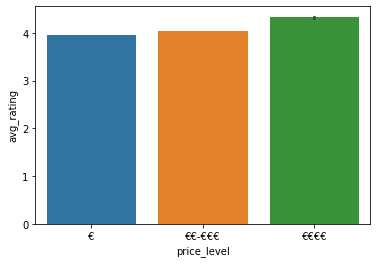

In [24]:
sns.barplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating')


In [25]:
restaurant.corr()

,open_days_per_week,avg_rating,reservation,cuisine_fr,cuisine_it,cuisine_ch,cuisine_ff,cuisine_jp,vegetarian,vegan,gluten,€,€€-€€€,€€€€
open_days_per_week,1.000000,-0.309311,-0.005747,-0.106779,0.015368,0.052537,0.086933,0.064690,-0.007614,-0.012168,-0.034183,0.051492,-0.017433,-0.078260
avg_rating,-0.309311,1.000000,-0.036315,0.115369,0.015914,-0.050752,-0.118893,-0.043188,0.140067,0.099889,0.071481,-0.044259,0.040555,0.087680
reservation,-0.005747,-0.036315,1.000000,0.179330,-0.015372,0.030513,-0.131320,0.014521,-0.282177,-0.139911,-0.071801,0.018730,0.124920,0.004246
cuisine_fr,-0.106779,0.115369,0.179330,1.000000,-0.196151,-0.173755,-0.159209,-0.183400,0.030759,-0.029841,0.041494,-0.112893,0.272071,0.129347
cuisine_it,0.015368,0.015914,-0.015372,-0.196151,1.000000,-0.054804,-0.028204,-0.057678,0.089200,0.026618,-0.016946,0.041263,0.042025,-0.052887
cuisine_ch,0.052537,-0.050752,0.030513,-0.173755,-0.054804,1.000000,-0.032899,0.294916,0.067726,0.027155,-0.011245,0.087706,-0.024861,-0.025136
cuisine_ff,0.086933,-0.118893,-0.131320,-0.159209,-0.028204,-0.032899,1.000000,-0.035978,-0.046335,-0.018638,-0.017077,0.221376,-0.145984,-0.047717
cuisine_jp,0.064690,-0.043188,0.014521,-0.183400,-0.057678,0.294916,-0.035978,1.000000,0.056613,0.027125,-0.002695,0.011406,0.031333,-0.008375
vegetarian,-0.007614,0.140067,-0.282177,0.030759,0.089200,0.067726,-0.046335,0.056613,1.000000,0.468803,0.263150,-0.014170,0.161674,0.050724
vegan,-0.012168,0.099889,-0.139911,-0.029841,0.026618,0.027155,-0.018638,0.027125,0.468803,1.000000,0.378349,-0.009745,0.084656,0.025101


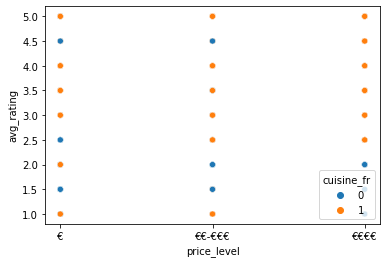

In [27]:
sns.scatterplot(data=restaurant, 
            x = 'price_level',
            y = 'avg_rating',
           hue = 'cuisine_fr')